## PROYECTO M√ìDULO 3: Optimizaci√≥n de Talento

#### A partir de un CSV con datos de trabajadores debemos tratar los datos siguiendo los siguientes pasos:

1. Averiguar por qu√© se han marchado las empleadas de la empresa.
2. Si queremos m√°s informaci√≥n o pistas podemos preguntarle a Roc√≠o
3. FASES: 
    1. Hacer un EDA
    2. Transformar los datos (limpieza de nulos, normalizaci√≥n, etc.)
    3. Visualizaci√≥n de datos (hacer gr√°ficas en Python). 
    4. BONUS: Dise√±o de base de datos e insertar los datos en SQL. 
    5. BONUS: Creaci√≥n de ETL, hacer funciones para automatizar el proceso. 
    6. Hacer una presentaci√≥n:
        - **Introducci√≥n, objetivos, pasos y organizaci√≥n**
        - Parte central: **an√°lisis de los gr√°ficas, tablas...**
        - **¬øQu√© info podemos obtener de estos? ¬øConsejos para la empresa? ¬øMejoras? ¬øEncontramos correlaci√≥n entre variables?**
        - **Retos y soluciones**
        - **Conclusiones**
4. Aplicar metodolog√≠a Agile y Srum. **Roc√≠o** va a ser la clienta final: **Product Owner**


### PARTE 4: VISUALIZACI√ìN

In [1]:
#Importar librer√≠a
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configuraci√≥n de la visualizaci√≥n del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Lectura del CSV y transformaci√≥n a DataFrame (df)
df=pd.read_csv("HR_RAW_v2.csv", index_col =0)
df.sample(5)

numero_empleado desvinculado  genero  edad  a√±o_nacimiento estado_civil  \
322               0.0           No  female    30            1993       single   
132             780.0          Yes    male    33            1990       single   
1113           1735.0           No  female    23            2000       single   
1303            615.0           No    male    40            1983        ns/nc   
541             804.0           No  female    34            1989        ns/nc   

      nivel_estudios campo_estudios frecuencia_viaje  distancia_domicilio  \
322                3          ns/nc       non travel                 3.22   
132                4          Other    travel rarely                 1.61   
1113               1          ns/nc       non travel                 6.44   
1303               3          Other       non travel                45.06   
541                4          ns/nc       non travel                 3.22   

     teletrabajo tipo_jornada  formaciones_ultimo_a√±o  trabajos_anteriores  \
322           no    part time                       2                    0   
132           no    part time                       2                    1   
1113          no    full time                       3                    1   
1303         yes    full time                       2                    3   
541          yes    part time                       3                    1   

      a√±os_en_activo  antig√ºedad_empresa  a√±os_ultimo_ascenso  \
322             12.0                  11                    6   
132             10.0                  10                    7   
1113             3.0                   3                    1   
1303            20.0                   1                    0   
541              6.0                   6                    1   

      a√±os_mismo_responsable            departamento  categoria  \
322                        7             sin asignar          1   
132                        8             sin asignar          1   
1113                       2             sin asignar          1   
1303                       1             sin asignar          3   
541                        3  research & development          1   

                     puesto horas_extras  evaluacion_desempe√±o  tarifa_hora  \
322   laboratory technician           No                   3.0         49.0   
132      research scientist           No                   3.0         63.0   
1113  laboratory technician           No                   3.0         51.0   
1303        sales executive           No                   3.0         58.0   
541      research scientist           No                   3.0         86.0   

      tarifa_diaria  tarifa_mensual  ingreso_mensual  %_incremento_salarial  \
322          1116.0            7181           4859.0                     14   
132           527.0            5207           4859.0                     13   
1113          160.0           12862           4859.0                     13   
1303         1094.0           11373           4859.0                     15   
541           121.0            7530           4381.0                     11   

      acceso_acciones_empresa  nivel_compromiso  nivel_satisfaccion_global  \
322                         0                 3                          3   
132                         0                 3                          4   
1113                        0                 3                          3   
1303                        1                 1                          3   
541                         0                 2                          3   

      nivel_satisfaccion_trabajo  nivel_ satisfaccion_relaciones  \
322                            4                               3   
132                            4                               3   
1113                           2                               3   
1303                           1                               3   
541                        

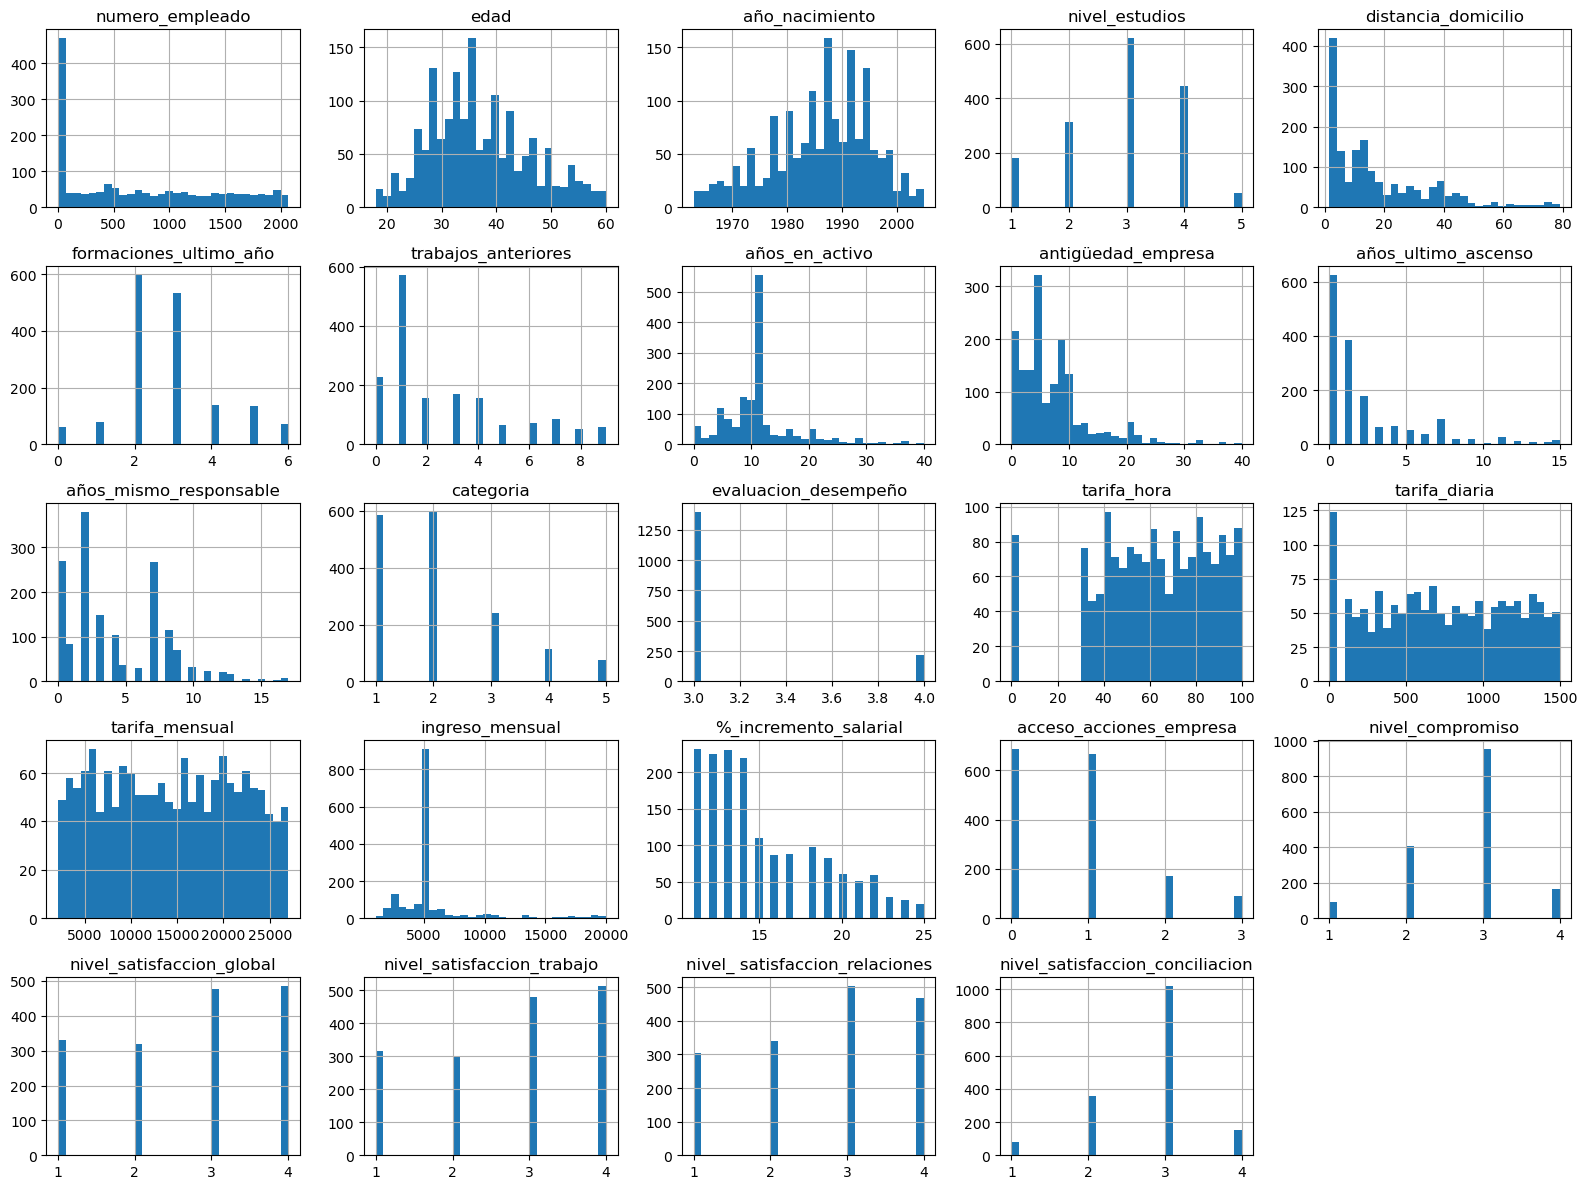

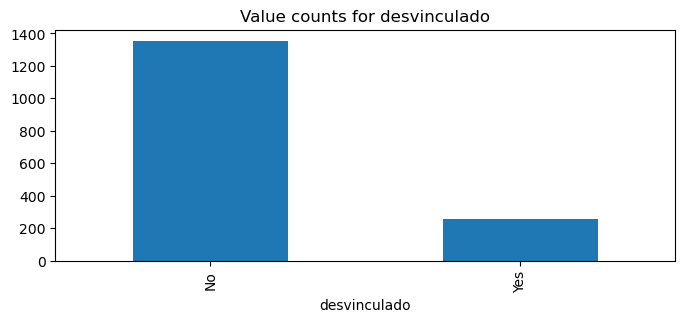

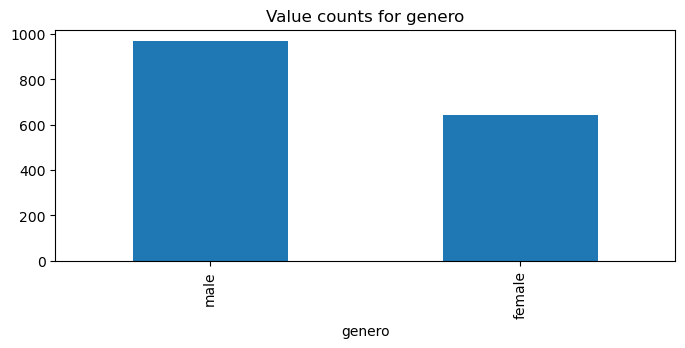

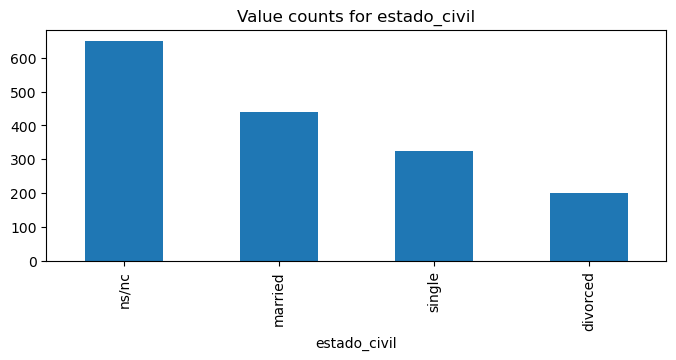

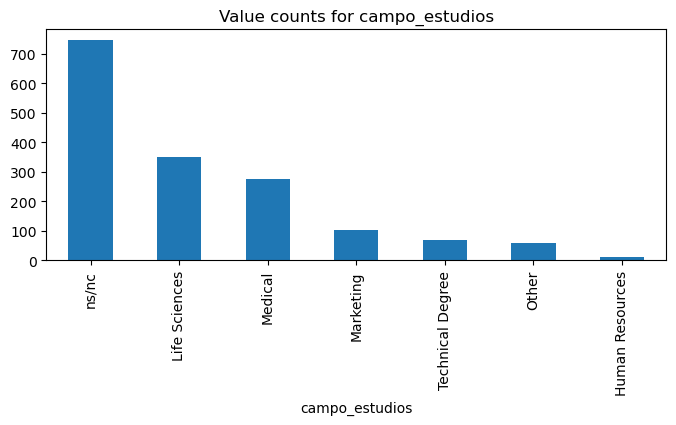

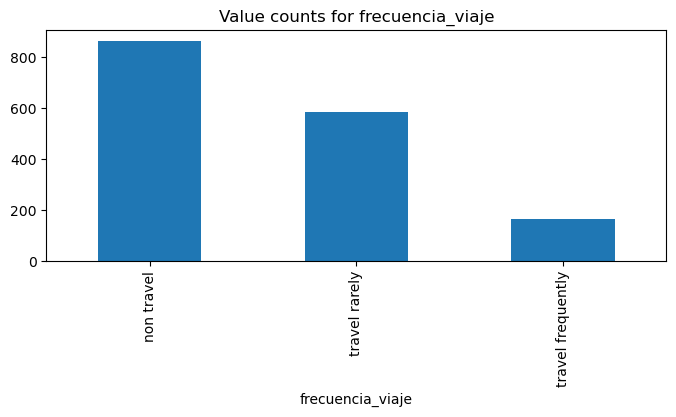

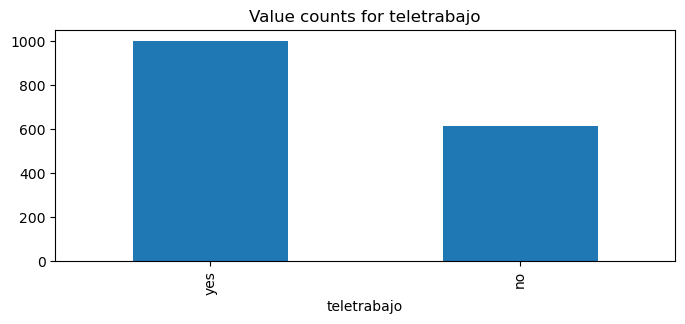

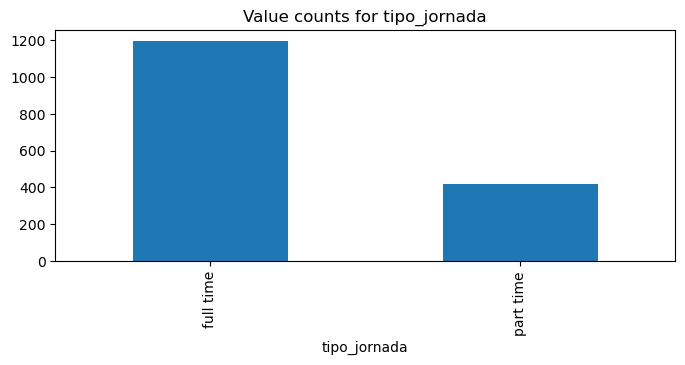

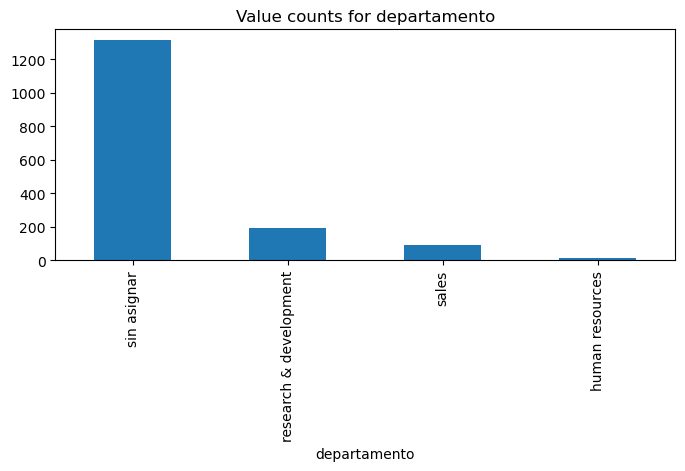

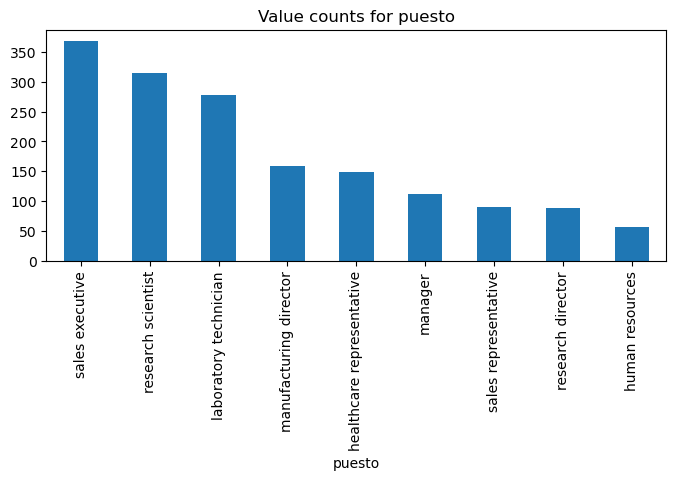

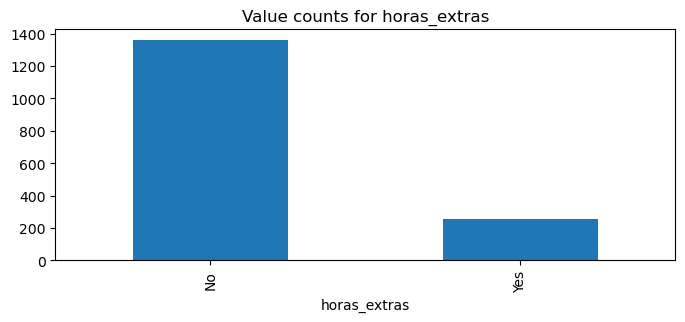

In [ ]:
# Histograms for numeric columns
df.select_dtypes(include=[np.number]).hist(figsize=(16,12), bins=30)
plt.tight_layout()
plt.show()


# Bar plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,3))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Value counts for {col}')
    plt.show()

    

üß† 1. ¬øSe est√°n yendo los empleados menos satisfechos?

Dejamos la consulta, ya que puede ser interesante analizar si las personas que se han ido son trabajadores que a la empresa le interesaba tener o no. 

* Consulta: ¬øSe van quienes tienen alta evaluaci√≥n, compromiso o satisfacci√≥n?
* Variables: desvinculado, nivel_compromiso, nivel_satisfaccion_global,nivel satisfaccion trabajo.
* ‚úÖ Gr√°fico: Boxplot: Comparar niveles de desempe√±o/satisfacci√≥n entre empleados activos vs. desvinculados.
    
    



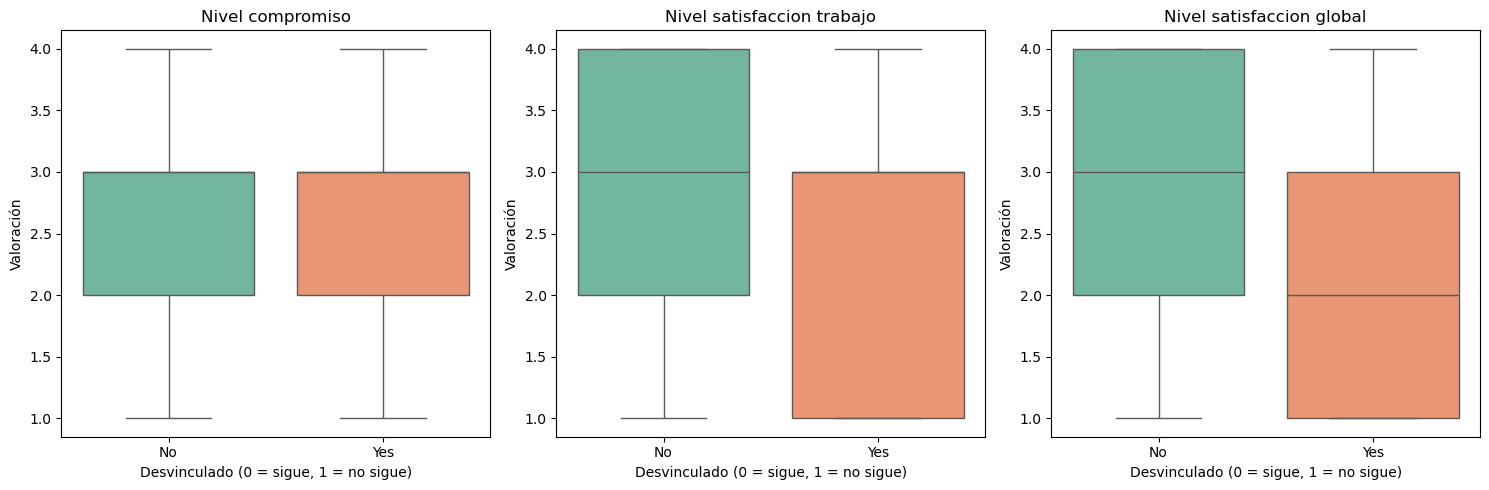

In [31]:
cols_valoracion = ['nivel_compromiso', 'nivel_satisfaccion_trabajo', 'nivel_satisfaccion_global']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_valoracion):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='desvinculado', y=col, hue='desvinculado', data=df, palette='Set2', legend=False)
    plt.title(f'{col.replace("_", " ").capitalize()}')
    plt.xlabel('Desvinculado (0 = sigue, 1 = no sigue)')
    plt.ylabel('Valoraci√≥n')
plt.tight_layout()
plt.show()

üí∏ 2. ¬øExiste una brecha entre desempe√±o y compensaci√≥n?

* Consulta: ¬øCobran menos quienes rinden m√°s? ¬øSe van?
* Variables: evaluacion_desempe√±o, ingreso_mensual, desvinculado
* ‚úÖ Gr√°fico sugerido:
    * Scatterplot: evaluacion_desempe√±o vs. ingreso_mensual, coloreado por desvinculado.
    * Heatmap de correlaciones entre variables salariales y de desempe√±o.



In [37]:
df[['desvinculado','evaluacion_desempe√±o','ingreso_mensual']]

desvinculado  evaluacion_desempe√±o  ingreso_mensual
0              No                   3.0          19537.0
1              No                   3.0          19999.0
2              No                   3.0          19232.0
3              No                   3.0          17169.0
4              No                   3.0           4859.0
5              No                   3.0          17174.0
6              No                   3.0           4859.0
7              No                   4.0           4859.0
8              No                   3.0          16595.0
9              No                   3.0           4859.0
10             No                   4.0          19973.0
11             No                   3.0          13402.0
12             No                   3.0          13206.0
13            Yes                   3.0          19545.0
14             No                   3.0           4859.0
15             No                   3.0          18041.0
16            Yes                   3.0          19246.0
17             No                   4.0           4859.0
18             No                   3.0           4859.0
19             No                   3.0           4859.0
20             No                   4.0          10748.0
21             No                   3.0           4859.0
22             No                   3.0           4859.0
23             No                   3.0          16752.0
24             No                   3.0           6201.0
25             No                   4.0           4859.0
26            Yes                   3.0          19845.0
27             No                   3.0           4859.0
28             No                   3.0           4859.0
29             No                   3.0           4001.0
30             No                   3.0          10447.0
31             No                   4.0           4859.0
32             No                   3.0           4859.0
33             No                   3.0           4859.0
34             No                   3.0           4859.0
35             No                   4.0           4859.0
36             No                   4.0          16064.0
37             No                   3.0           3210.0
38             No                   3.0          10266.0
39             No                   4.0          10475.0
40             No                   3.0           6162.0
41             No                   3.0           4721.0
42             No                   3.0           4859.0
43            Yes                   3.0           4859.0
44             No                   4.0           4615.0
45             No                   3.0           4859.0
46             No                   4.0           4859.0
47             No                   3.0          16959.0
48             No                   3.0           4859.0
49             No                   3.0           4859.0
50             No                   3.0           4859.0
51             No                   3.0           4859.0
52            Yes                   3.0          10306.0
53             No                   3.0           4859.0
54             No                   3.0           4859.0
55             No                   4.0           5406.0
56             No                   3.0           4859.0
57             No                   3.0           4859.0
58             No                   3.0           5902.0
59             No                   3.0          10855.0
60             No                   3.0           5914.0
61             No                   3.0           4859.0
62             No                   3.0           6646.0
63             No                   4.0           4859.0
64             No                   3.0          13973.0
65             No                   3.0           4859.0
66             No                   3.0          13320.0
67             No                   4.0           4859.0
68             No                   4.0           4859.0
69            

In [41]:
df_ingreso= df.groupby('desvinculado')['ingreso_mensual'].mean().round(2)
df_ingreso

desvinculado
No     5788.42
Yes    4815.15
Name: ingreso_mensual, dtype: float64

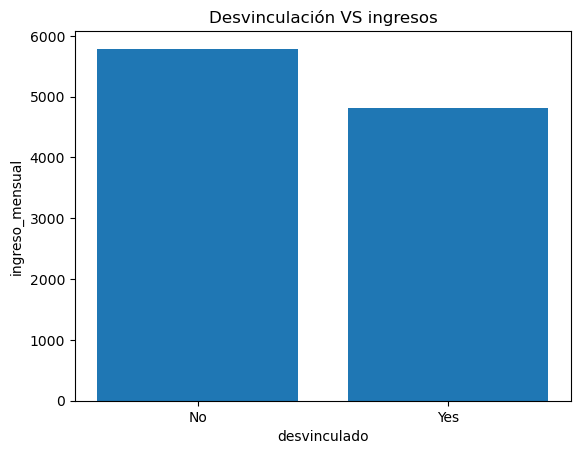

In [45]:
plt.bar(x=df_ingreso.index, height=df_ingreso.values)
plt.xlabel('desvinculado')
plt.ylabel('ingreso_mensual')
plt.title('Desvinculaci√≥n VS ingresos')
plt.show()

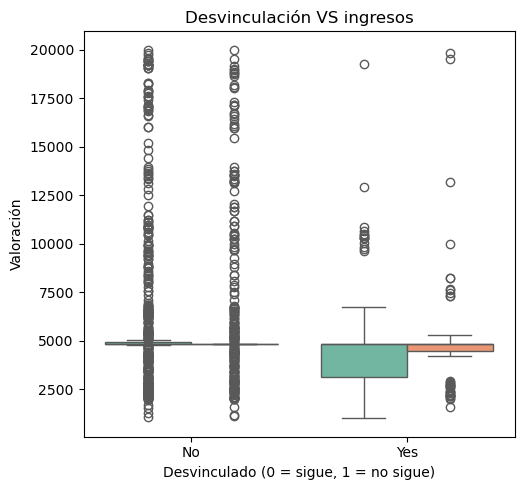

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, i + 1)
sns.boxplot(x='desvinculado', y='ingreso_mensual', hue='genero', data=df, palette='Set2', legend=False)
plt.title('Desvinculaci√≥n VS ingresos')
plt.xlabel('Desvinculado (0 = sigue, 1 = no sigue)')
plt.ylabel('Valoraci√≥n')
plt.tight_layout()
plt.show()

üß≠ 3. ¬øLa movilidad interna reduce la desvinculaci√≥n?

* Consulta: ¬øSe quedan m√°s quienes han sido promovidos o cambiaron de jefe?
* Variables: a√±os_ultimo_ascenso, a√±os_mismo_responsable, desvinculado
* ‚úÖ Gr√°fico: gr√°fico de barras.


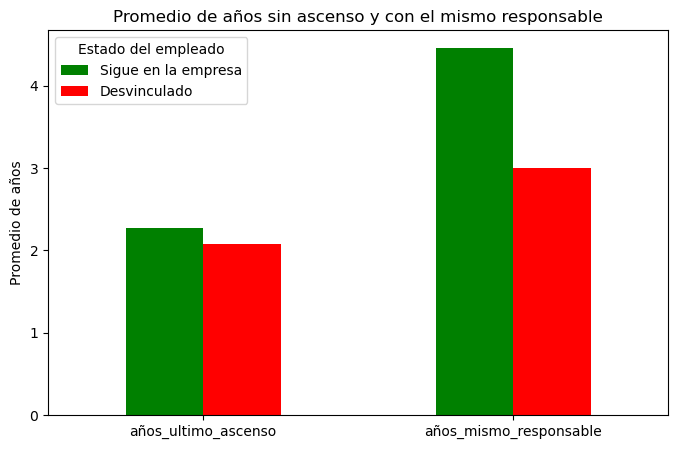

In [38]:
df_grouped = df.groupby('desvinculado')[['a√±os_ultimo_ascenso', 'a√±os_mismo_responsable']].mean().T
# Renombrar columnas para claridad
df_grouped.columns = ['Sigue en la empresa', 'Desvinculado']
# Gr√°fico de barras
df_grouped.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Promedio de a√±os sin ascenso y con el mismo responsable')
plt.ylabel('Promedio de a√±os')
plt.xticks(rotation=0)
plt.legend(title='Estado del empleado')
plt.show()